## 1. Import necessasy libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve 

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier


In [2]:
!pip install xgboost
import xgboost as xgb
import lightgbm as lgb 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


## 2. Import Data

In [3]:
credit_cards = pd.read_csv('credit_card_clean.csv')
credit_cards

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
pd.set_option('Max_columns',None)

In [5]:
credit_cards

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## 3. Data Understanding

### Exploring the variable

### 3.2 Intial analysis

In [6]:
credit_cards.shape

(30000, 25)

In [7]:
credit_cards.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [8]:
credit_cards.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## 4. Data Preparation

In [9]:
le = LabelEncoder()
credit_cards['sex_encoder']       = le.fit_transform(credit_cards['SEX'])
credit_cards['education_encoder'] = le.fit_transform(credit_cards['EDUCATION'])
credit_cards['marriage_encoder']  = le.fit_transform(credit_cards['MARRIAGE'])

In [10]:
credit_cards.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,sex_encoder,education_encoder,marriage_encoder
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,3,0
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,3,2
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,3,2
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,3,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,3,0
5,6,50000.0,male,grad,single,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,1,0,2
6,7,500000.0,male,grad,single,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,1,0,2
7,8,100000.0,female,university,single,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,3,2
8,9,140000.0,female,highschool,married,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0,1,0
9,10,20000.0,male,highschool,single,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,1,1,2


### Remove unwanted features

In [11]:
credit_cards.drop( labels=['ID','EDUCATION','SEX','MARRIAGE'], axis=1,inplace=True)

In [12]:
credit_cards.head(10)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,sex_encoder,education_encoder,marriage_encoder
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,3,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,3,2
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,3,2
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,3,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,3,0
5,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,1,0,2
6,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,1,0,2
7,100000.0,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,3,2
8,140000.0,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0,1,0
9,20000.0,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,1,1,2


### 5. Model building

In [13]:
x = credit_cards.drop(labels='DEFAULT',  axis=1,)
y = credit_cards[['DEFAULT']]

In [14]:
x

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,sex_encoder,education_encoder,marriage_encoder
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,3,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,3,2
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,3,2
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,3,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1,1,0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1,1,2
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,3,2
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1,0


In [15]:
y

,DEFAULT
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,  stratify=y,)

In [17]:
# training samples
x_train.shape,y_train.shape

((24000, 23), (24000, 1))

In [18]:
# test data
x_test.shape,y_test.shape

((6000, 23), (6000, 1))

###  6. Model Training

#### Intiallizing all the algorithms for comparison

In [19]:
rf_classifier         = RandomForestClassifier()
adboost_classifier    = AdaBoostClassifier()
gb_classifier         = GradientBoostingClassifier()
xgb_classifier        = XGBClassifier()
lgb_classifier        = LGBMClassifier()

### Train models

In [20]:
%%time
rf_classifier.fit(x_train,y_train)

Wall time: 5.51 s


RandomForestClassifier()

In [21]:
%%time
adboost_classifier.fit(x_train,y_train)

Wall time: 1.89 s


AdaBoostClassifier()

In [22]:
%%time
gb_classifier.fit(x_train,y_train)


Wall time: 8.02 s


GradientBoostingClassifier()

In [23]:
%%time
xgb_classifier.fit(x_train,y_train)

[00:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.17 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
%%time
lgb_classifier.fit(x_train,y_train)

Wall time: 259 ms


LGBMClassifier()

### 7. Model Testing

#### Training data

In [25]:
y_train_pred_rf    = rf_classifier.predict(x_train)
y_train_pred_adb   = adboost_classifier.predict(x_train)
y_train_pred_gb    = gb_classifier.predict(x_train)
y_train_pred_xgb   = xgb_classifier.predict(x_train)
y_train_pred_lgb   = lgb_classifier.predict(x_train)

#### Test data

In [26]:
y_test_pred_rf    = rf_classifier.predict(x_test)
y_test_pred_adb   = adboost_classifier.predict(x_test)
y_test_pred_gb    = gb_classifier.predict(x_test)
y_test_pred_xgb   = xgb_classifier.predict(x_test)
y_test_pred_lgb   = lgb_classifier.predict(x_test)

### 8. Model Evaluation

#### Random Forest Metrics

In [27]:
print('RF Accuracy    :',accuracy_score(y_test,y_test_pred_rf))
print('RF Precision   :',precision_score(y_test,y_test_pred_rf))
print('RF Recall      :',recall_score(y_test,y_test_pred_rf))

RF Accuracy    : 0.8203333333333334
RF Precision   : 0.6675639300134589
RF Recall      : 0.373775433308214


In [28]:
print('RF Accuracy    :',accuracy_score(y_train,y_train_pred_rf))
print('RF Precision   :',precision_score(y_train,y_train_pred_rf))
print('RF Recall      :',recall_score(y_train,y_train_pred_rf))

RF Accuracy    : 0.9995
RF Precision   : 0.9984942593638246
RF Recall      : 0.9992465624411377


#### AdaBoost

print('AdaBOOst Accuracy    :',accuracy_score(y_test,y_test_pred_adb))
print('AdaBOOst Precision   :',precision_score(y_test,y_test_pred_adb))
print('AdaBOOst Recall      :',recall_score(y_test,y_test_pred_adb))

#### Gradient Boosting

In [31]:
print('Gradient Boost Accuracy    :',accuracy_score(y_test,y_test_pred_gb))
print('Gradient Boost Precision   :',precision_score(y_test,y_test_pred_gb))
print('Gradient Boost Recall      :',recall_score(y_test,y_test_pred_gb))

Gradient Boost Accuracy    : 0.8223333333333334
Gradient Boost Precision   : 0.6883116883116883
Gradient Boost Recall      : 0.359457422758101


#### XGBM Boosting

In [34]:
print('XGBM Boost Accuracy    :',accuracy_score(y_test,y_test_pred_xgb))
print('XGBM  Precision        :',precision_score(y_test,y_test_pred_xgb))
print('XGBM  Recall           :',recall_score(y_test,y_test_pred_xgb))

XGBM Boost Accuracy    : 0.8183333333333334
XGBM  Precision        : 0.6573705179282868
XGBM  Recall           : 0.3730218538055765


#### LGBM Boosting

In [36]:
print('LGBM Boost Accuracy    :',accuracy_score(y_test,y_test_pred_lgb))
print('LGBM  Precision        :',precision_score(y_test,y_test_pred_lgb))
print('LGBM  Recall           :',recall_score(y_test,y_test_pred_lgb))

LGBM Boost Accuracy    : 0.8225
LGBM  Precision        : 0.6860795454545454
LGBM  Recall           : 0.36397889977392617


### Feature Importance

In [41]:
rf_imp_features = rf_classifier.feature_importances_

In [56]:
adb_imp_features = adboost_classifier.feature_importances_

In [42]:
gb_imp_features = gb_classifier.feature_importances_

In [43]:
xgb_imp_features = xgb_classifier.feature_importances_

In [44]:
lgb_imp_features = lgb_classifier.feature_importances_

In [47]:
x_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'sex_encoder', 'education_encoder',
       'marriage_encoder'],
      dtype='object')

In [61]:
feature_importance = pd.DataFrame({'Features'     : x_train.columns,
                                   'ADB_Features' : adb_imp_features,
                                   'RF_Features'  : rf_imp_features,
                                   'GB_Features'  : gb_imp_features,
                                   'xgb_Features' : xgb_imp_features,
                                   'lgb_Features' : lgb_imp_features})
feature_importance

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
1,AGE,0.00,0.067074,0.006280,0.016504,203
2,PAY_1,0.14,0.094609,0.626437,0.367139,98
3,PAY_2,0.08,0.045090,0.074518,0.130508,49
4,PAY_3,0.02,0.029670,0.039008,0.060984,48
5,PAY_4,0.02,0.025545,0.020054,0.036737,43
6,PAY_5,0.04,0.019344,0.017262,0.030141,28
7,PAY_6,0.02,0.018391,0.016706,0.032507,57
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
9,BILL_AMT2,0.02,0.054670,0.008156,0.019316,142


### RF Importance Features

In [62]:
rf_imp = feature_importance.sort_values(by = 'RF_Features', ascending=False,)
rf_imp

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
2,PAY_1,0.14,0.094609,0.626437,0.367139,98
1,AGE,0.00,0.067074,0.006280,0.016504,203
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
9,BILL_AMT2,0.02,0.054670,0.008156,0.019316,142
10,BILL_AMT3,0.06,0.051673,0.010523,0.018816,145
13,BILL_AMT6,0.02,0.051625,0.009275,0.018549,183
11,BILL_AMT4,0.04,0.051077,0.006440,0.019451,139
14,PAY_AMT1,0.04,0.050878,0.019868,0.023129,204
12,BILL_AMT5,0.06,0.049297,0.006993,0.019734,135


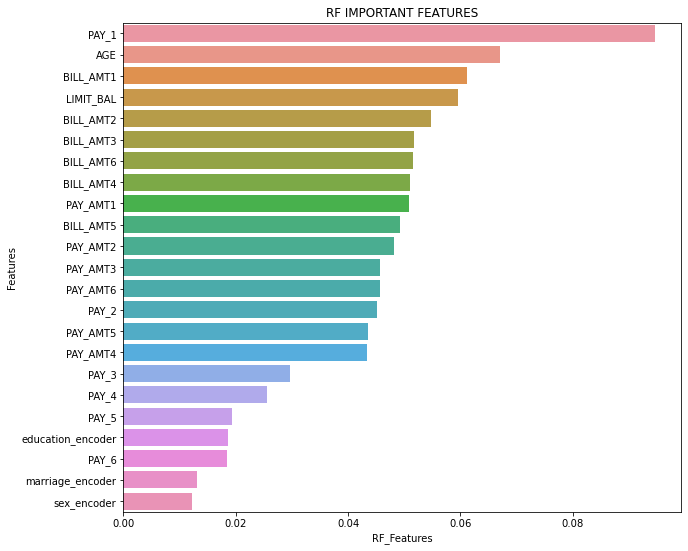

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))
sns.barplot(x='RF_Features', y='Features',data=rf_imp)
plt.title('RF IMPORTANT FEATURES')
plt.show()

### AdaBoost Important Features

In [64]:
adb_imp = feature_importance.sort_values(by = 'ADB_Features', ascending=False,)
adb_imp

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
2,PAY_1,0.14,0.094609,0.626437,0.367139,98
3,PAY_2,0.08,0.045090,0.074518,0.130508,49
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
10,BILL_AMT3,0.06,0.051673,0.010523,0.018816,145
16,PAY_AMT3,0.06,0.045714,0.020805,0.023957,179
15,PAY_AMT2,0.06,0.048167,0.017606,0.021841,220
12,BILL_AMT5,0.06,0.049297,0.006993,0.019734,135
17,PAY_AMT4,0.04,0.043426,0.012980,0.019408,178
14,PAY_AMT1,0.04,0.050878,0.019868,0.023129,204


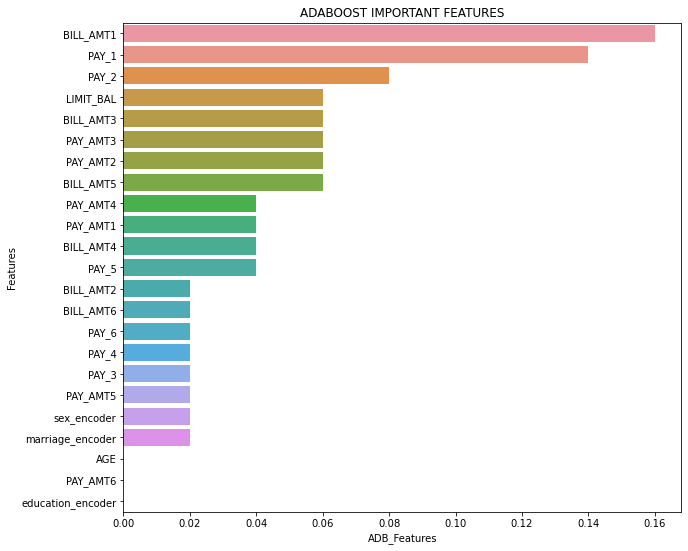

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))
sns.barplot(x='ADB_Features', y='Features',data=adb_imp)
plt.title('ADABOOST IMPORTANT FEATURES')
plt.show()

#### GB Features

In [69]:
gb_imp = feature_importance.sort_values(by = 'GB_Features', ascending=False,)
gb_imp

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
2,PAY_1,0.14,0.094609,0.626437,0.367139,98
3,PAY_2,0.08,0.045090,0.074518,0.130508,49
4,PAY_3,0.02,0.029670,0.039008,0.060984,48
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
16,PAY_AMT3,0.06,0.045714,0.020805,0.023957,179
5,PAY_4,0.02,0.025545,0.020054,0.036737,43
14,PAY_AMT1,0.04,0.050878,0.019868,0.023129,204
15,PAY_AMT2,0.06,0.048167,0.017606,0.021841,220
6,PAY_5,0.04,0.019344,0.017262,0.030141,28


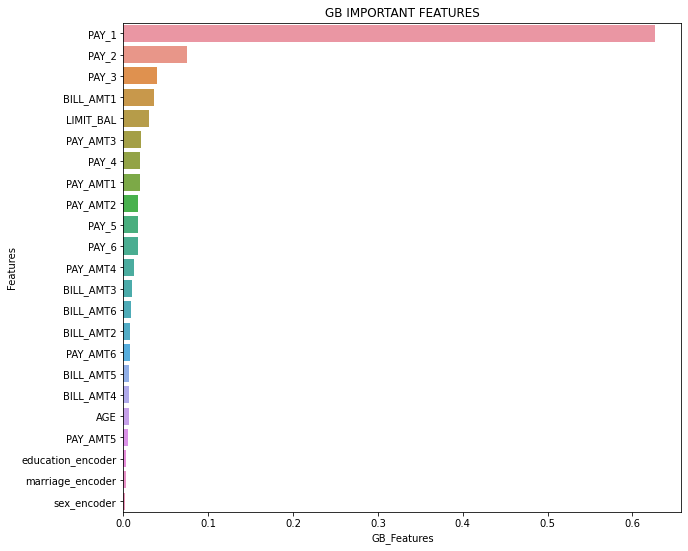

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))
sns.barplot(x='GB_Features', y='Features',data=gb_imp)
plt.title('GB IMPORTANT FEATURES')
plt.show()

#### XGB Features

In [71]:
xgb_imp = feature_importance.sort_values(by = 'xgb_Features', ascending=False,)
xgb_imp

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
2,PAY_1,0.14,0.094609,0.626437,0.367139,98
3,PAY_2,0.08,0.045090,0.074518,0.130508,49
4,PAY_3,0.02,0.029670,0.039008,0.060984,48
5,PAY_4,0.02,0.025545,0.020054,0.036737,43
7,PAY_6,0.02,0.018391,0.016706,0.032507,57
6,PAY_5,0.04,0.019344,0.017262,0.030141,28
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
16,PAY_AMT3,0.06,0.045714,0.020805,0.023957,179
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
14,PAY_AMT1,0.04,0.050878,0.019868,0.023129,204


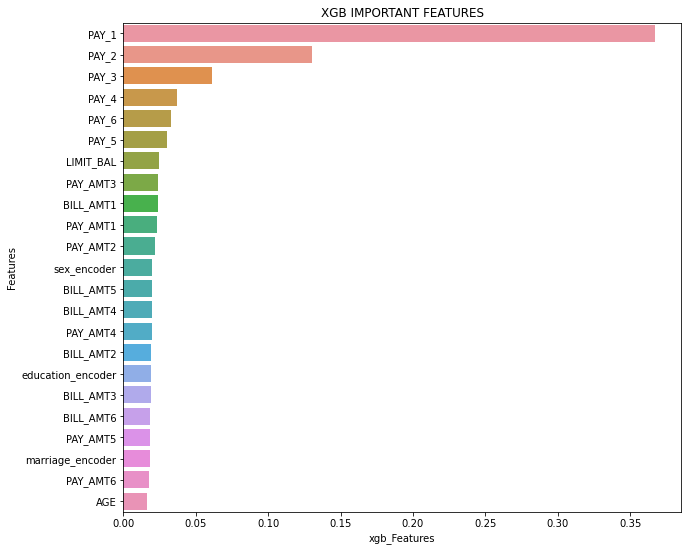

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))
sns.barplot(x='xgb_Features', y='Features',data=xgb_imp)
plt.title('XGB IMPORTANT FEATURES')
plt.show()

####  lgb Features

In [73]:
lgb_imp = feature_importance.sort_values(by = 'lgb_Features', ascending=False,)
lgb_imp

,Features,ADB_Features,RF_Features,GB_Features,xgb_Features,lgb_Features
8,BILL_AMT1,0.16,0.061171,0.036533,0.023657,256
15,PAY_AMT2,0.06,0.048167,0.017606,0.021841,220
0,LIMIT_BAL,0.06,0.059499,0.029915,0.024432,211
14,PAY_AMT1,0.04,0.050878,0.019868,0.023129,204
1,AGE,0.00,0.067074,0.006280,0.016504,203
19,PAY_AMT6,0.00,0.045681,0.007630,0.017803,188
13,BILL_AMT6,0.02,0.051625,0.009275,0.018549,183
16,PAY_AMT3,0.06,0.045714,0.020805,0.023957,179
17,PAY_AMT4,0.04,0.043426,0.012980,0.019408,178
18,PAY_AMT5,0.02,0.043460,0.005624,0.018350,162


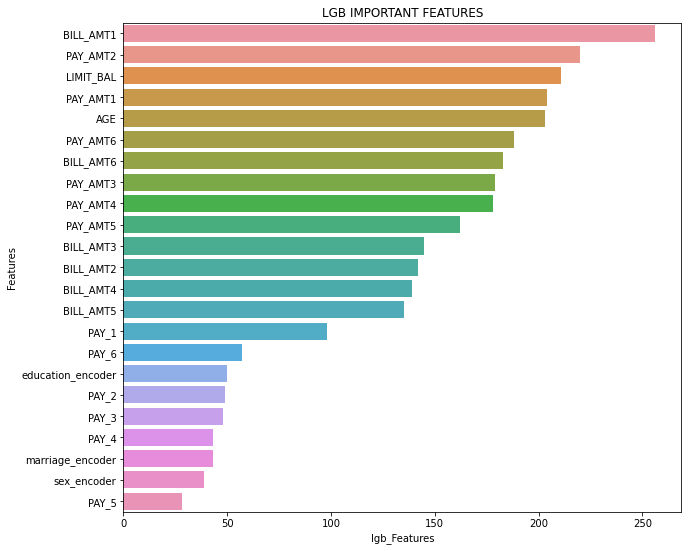

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))
sns.barplot(x='lgb_Features', y='Features',data=lgb_imp)
plt.title('LGB IMPORTANT FEATURES')
plt.show()